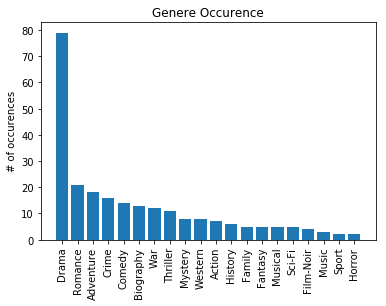

In [18]:
from bs4 import BeautifulSoup
import requests
import pickle
def film_list():
    getPage = requests.get('https://www.imdb.com/list/ls055592025/')
    getPage.raise_for_status()
    Page = BeautifulSoup(getPage.text, 'html.parser')
    movie_details = {
        "data": []
    }
    MoviesList = Page.find_all(class_="mode-detail")
    for list in MoviesList:
        name = list.find(class_="lister-item-header").text
       
        Movie_genre = list.find('span',class_="genre").text

        rating = list.find(class_="ipl-rating-star__rating").text

        details = {
                    "Name" : name,
                    "Genre" : Movie_genre,
                    "Rating" : rating,
                }
        movie_details['data'].append(details)
        #print(details)
        
    with open('movie_details_pickle.pkl', 'wb') as f:
        pickle.dump(movie_details,f,protocol=pickle.HIGHEST_PROTOCOL) 
        
    return movie_details
        
movie_details = film_list()

gener_count = {}


for gener in movie_details['data'] :
    gener_list = gener['Genre'].split(',')
    for index in range(len(gener_list)):
        gener_list[index] = gener_list[index].strip()
        gener_list[index] = gener_list[index].rstrip('\n')
        
    for gnr in gener_list:
        if gnr in list(gener_count.keys()):
            gener_count[gnr] = gener_count[gnr] + 1
        else:
            gener_count[gnr] = 1
            
            
import matplotlib.pyplot as plt

NUM_VALUES = 20

heights = list(gener_count.values())

heights.sort(reverse = True)

#plt.bar(range(len(heights)), heights)

plt.bar(range(NUM_VALUES), heights[:NUM_VALUES])

plt.title('Genere Occurence')
plt.ylabel('# of occurences')
keys = list(gener_count.keys())

keys.sort(reverse = True, key = lambda x:gener_count[x])


#plt.xticks(range(len(heights)), keys)

plt.xticks(range(NUM_VALUES), keys[:NUM_VALUES],
          rotation = 90)
                                                     
plt.show()
    
    
    
    





UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [ ]:
 with open(self.file_path, 'a') as csv_file:
        wr = csv.writer(csv_file, delimiter='|')
        row = ['klines', symbol]
        row.extend(pickle.dumps(object))
        wr.writerow(row)